In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("TensorFlow version:", tf.__version__)

NumPy version: 1.24.3
Pandas version: 2.2.3
TensorFlow version: 2.19.0


In [10]:
#Load Libraries

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

In [11]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [12]:
# Normalize the image data

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape data for CNN input

x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# One-hot encode the labels

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Class names for prediction display

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
# Build the CNN model

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu'),       # 1
    layers.MaxPooling2D((2, 2)),                        # 2

    layers.Conv2D(64, (3, 3), activation='relu'),       # 3
    layers.MaxPooling2D((2, 2)),                        # 4

    layers.Conv2D(128, (3, 3), activation='relu'),      # 5

    layers.Flatten(),
    layers.Dense(128, activation='relu'),               # 6 ← fully connected
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')             # output layer 
])


In [14]:
# Compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train_cat, epochs=10, batch_size=64,
                    validation_data=(x_test, y_test_cat))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 78ms/step - accuracy: 0.6925 - loss: 0.8291 - val_accuracy: 0.8612 - val_loss: 0.3819
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 70s 75ms/step - accuracy: 0.8615 - loss: 0.3847 - val_accuracy: 0.8883 - val_loss: 0.3114
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 64s 68ms/step - accuracy: 0.8891 - loss: 0.3048 - val_accuracy: 0.8892 - val_loss: 0.3095
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 54ms/step - accuracy: 0.9017 - loss: 0.2710 - val_accuracy: 0.8978 - val_loss: 0.2794
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9107 - loss: 0.2454 - val_accuracy: 0.8990 - val_loss: 0.2707
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9178 - loss: 0.2202 - val_accuracy: 0.9057 - val_loss: 0.2692
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9229 - loss: 0.2055 - val_accuracy: 0.9056 - val_loss: 0.2565
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9291 - loss: 0.1901 - 

In [17]:
# Train the model

model.fit(x_train, y_train_cat, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9452 - loss: 0.1461 - val_accuracy: 0.9427 - val_loss: 0.1493
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9511 - loss: 0.1297 - val_accuracy: 0.9467 - val_loss: 0.1448
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9523 - loss: 0.1247 - val_accuracy: 0.9375 - val_loss: 0.1706
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9568 - loss: 0.1124 - val_accuracy: 0.9368 - val_loss: 0.1729
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9610 - loss: 0.1015 - val_accuracy: 0.9360 - val_loss: 0.1820


In [20]:
# Evaluate the model

test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9134 - loss: 0.3468
Test accuracy: 0.9120


In [21]:
# Predict on two test images

sample_images = x_test[:2]
sample_labels = y_test_cat[:2]
predictions = model.predict(sample_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


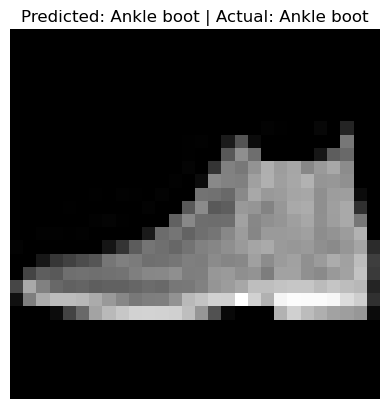

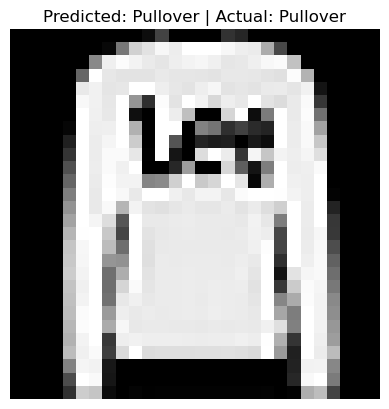

In [22]:
# Display predictions with class names

for i in range(2):
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(sample_labels[i])
    plt.title(f"Predicted: {class_names[predicted_label]} | Actual: {class_names[true_label]}")
    plt.axis('off')
    plt.show()

In [2]:
import sys
print(sys.executable)

C:\Users\Ayobola Kazeem\anaconda3\python.exe
